In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/online_retail_II.csv')

# Display the first few rows of the dataset
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
# Drop rows with missing values in 'Customer ID' and 'Description'
df = df.dropna(subset=['Customer ID', 'Description'])

# Create a new feature 'TotalPrice' by multiplying 'Quantity' and 'Price'
df['TotalPrice'] = df['Quantity'] * df['Price']

# Convert 'InvoiceDate' to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract useful features like 'Month' and 'DayOfWeek'
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# Filter out negative or zero quantities and prices
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]

# Check the cleaned dataset
df.head()


<ipython-input-4-12a3196e56a2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['Price']


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Month,DayOfWeek
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,12,1
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,12,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,12,1
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,12,1
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,12,1


In [ ]:
from sklearn.model_selection import train_test_split

# Select features and target variable
X = df[['Quantity', 'Price', 'Month', 'DayOfWeek']]  # Independent variables
y = df['TotalPrice']  # Dependent variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error


# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae_lin = mean_absolute_error(y_test, y_pred)


print('Mean Squared Error:', mse)
print('R^2 Score:', r2)
print(f'Mean Absolute Error for Linear Regression: {mae_lin}')


Mean Squared Error: 7395.290858276713
R^2 Score: -0.6311372107717548
Mean Absolute Error for Linear Regression: 12.461739427047904


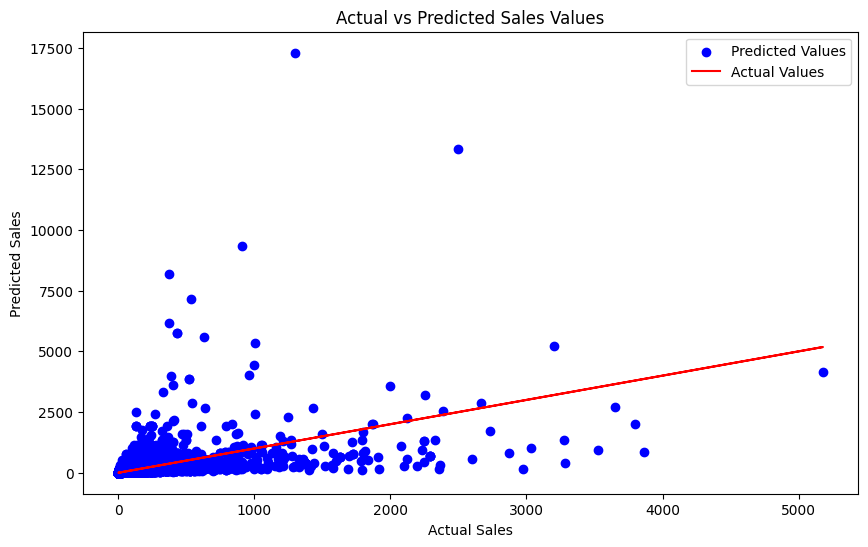

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted sales values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted Values')
plt.plot(y_test, y_test, color='red', label='Actual Values')
plt.title('Actual vs Predicted Sales Values')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.legend()
plt.show()
